# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url =  f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response=requests.get(city_url)
        
        # Parse the JSON and retrieve data
        
        response_json=response.json()
        
        city_weather = response_json['weather']
    
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json ['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | kalmunai
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | khanpur
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | luganville
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | moose jaw
Processing Record 11 of Set 1 | yerofey pavlovich
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | luau
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | asau village
City not found. Skipping...
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | menongue
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730068597
1,ushuaia,-54.8000,-68.3000,7.81,57,75,1.03,AR,1730068598
2,praia da vitoria,38.7333,-27.0667,18.14,77,75,3.60,PT,1730068599
3,kalmunai,7.4167,81.8167,26.24,84,49,0.48,LK,1730068600
4,blackmans bay,-43.0167,147.3167,12.07,62,13,1.79,AU,1730068601


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730068597
1,ushuaia,-54.8000,-68.3000,7.81,57,75,1.03,AR,1730068598
2,praia da vitoria,38.7333,-27.0667,18.14,77,75,3.60,PT,1730068599
3,kalmunai,7.4167,81.8167,26.24,84,49,0.48,LK,1730068600
4,blackmans bay,-43.0167,147.3167,12.07,62,13,1.79,AU,1730068601


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

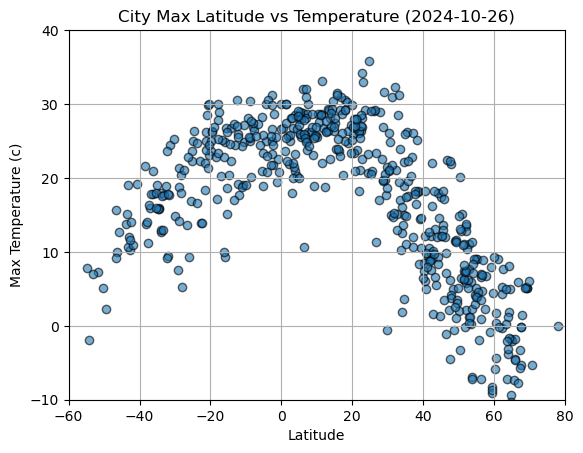

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.title(f"City Max Latitude vs Temperature (2024-10-26)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(-10, 40)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

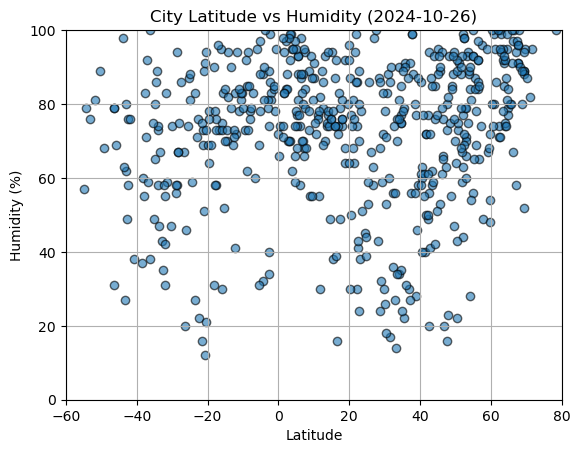

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity (2024-10-26)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

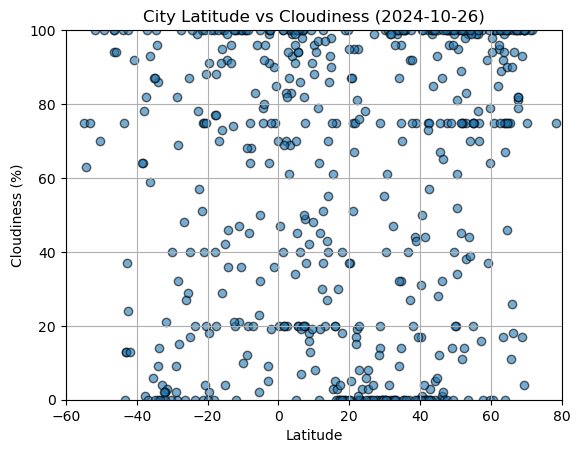

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness (2024-10-26)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

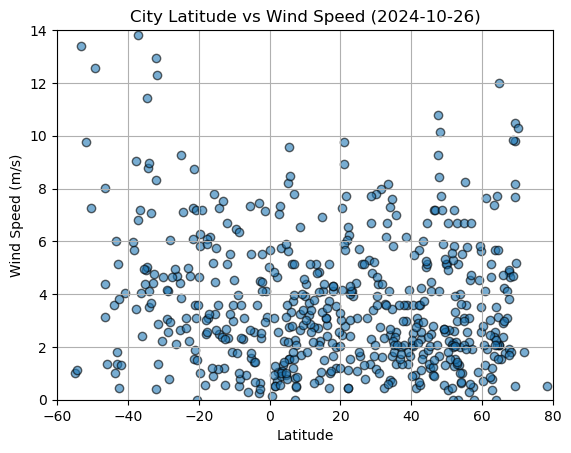

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o',edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed (2024-10-26)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 14)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared value is: 0.9710


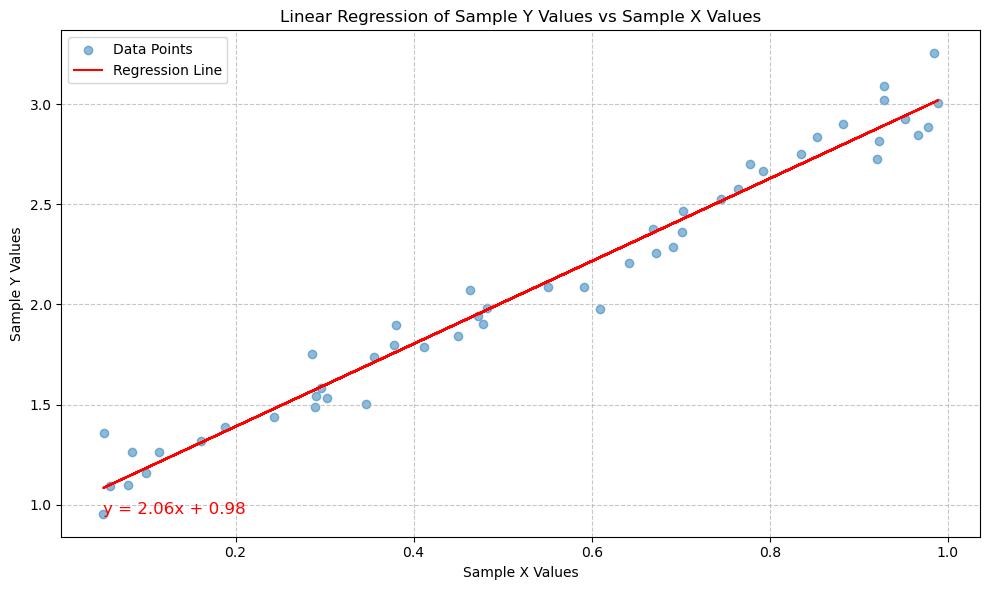

<Figure size 640x480 with 0 Axes>

In [13]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt  # For creating plots
import pandas as pd             # For data manipulation and analysis
import numpy as np             # For numerical operations
import requests               # For making API calls
import time                  # For adding delays between API calls
from scipy.stats import linregress  # For linear regression calculations
from pprint import pprint    # For pretty printing data structures
 
# Import API key from separate file for security
from api_keys import weather_api_key
 
# Import citipy for getting city data based on coordinates
from citipy import citipy
 
def create_linear_regression_plot(x_values, y_values, xlabel, ylabel):
    """
    Create a scatter plot with linear regression line and equation.
 
    Parameters:
    -----------
    x_values : array-like
        Values for x-axis
    y_values : array-like
        Values for y-axis
    xlabel : str
        Label for x-axis
    ylabel : str
        Label for y-axis
 
    Returns:
    --------
    None. Displays plot and prints r-squared value.
    """
 
    # Ensure inputs are numpy arrays
    x_values = np.array(x_values)
    y_values = np.array(y_values)
 
    # Check for valid input data
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must have the same length")
 
    # Calculate linear regression
    try:
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
 
        # Calculate regression line values
        reg_values = x_values * slope + intercept
 
        # Create equation string for annotation
        line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
 
        # Create the plot
        plt.figure(figsize=(10, 6))  # Set figure size
 
        # Create scatter plot of original data
        plt.scatter(x_values, y_values, alpha=0.5, label='Data Points')
 
        # Add regression line
        plt.plot(x_values, reg_values, 'r-', label='Regression Line')
 
        # Add line equation annotation
        # Position annotation at bottom left of plot
        plt.annotate(line_equation, 
                    xy=(min(x_values), min(y_values)),
                    fontsize=12,
                    color="red")
 
        # Add labels and title
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f"Linear Regression of {ylabel} vs {xlabel}")
 
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
 
        # Add legend
        plt.legend()
 
        # Print R-squared value
        print(f"The r-squared value is: {rvalue**2:.4f}")
 
        # Show plot
        plt.tight_layout()  # Adjust layout to prevent label cutoff
        plt.show()
 
    except Exception as e:
        print(f"Error during linear regression: {str(e)}")
 
    finally:
        # Clear the current figure
        plt.clf()
 
# Example usage:
if __name__ == "__main__":
    # Create sample data
    x = np.random.rand(50)
    y = 2 * x + 1 + np.random.normal(0, 0.1, 50)
 
    try:
        # Create plot with sample data
        create_linear_regression_plot(
            x_values=x,
            y_values=y,
            xlabel="Sample X Values",
            ylabel="Sample Y Values"
        )
    except Exception as e:
        print(f"Error in example: {str(e)}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730068597
2,praia da vitoria,38.7333,-27.0667,18.14,77,75,3.60,PT,1730068599
3,kalmunai,7.4167,81.8167,26.24,84,49,0.48,LK,1730068600
5,khanpur,28.6453,70.6567,26.90,24,14,2.31,PK,1730068602
6,iskateley,67.6803,53.1512,-0.17,91,81,4.85,RU,1730068604


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,7.81,57,75,1.03,AR,1730068598
4,blackmans bay,-43.0167,147.3167,12.07,62,13,1.79,AU,1730068601
7,luganville,-15.5333,167.1667,26.78,83,100,4.46,VU,1730068605
8,puerto natales,-51.7236,-72.4875,7.25,81,100,9.77,CL,1730068606
11,grytviken,-54.2811,-36.5092,-1.89,79,63,1.14,GS,1730068609


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere Analysis
Statistical Results for Northern Hemisphere: Max Temperature vs Latitude
R-squared (r²): 0.7295
P-value: 0.0000
Standard Error: 0.0161
--------------------------------------------------


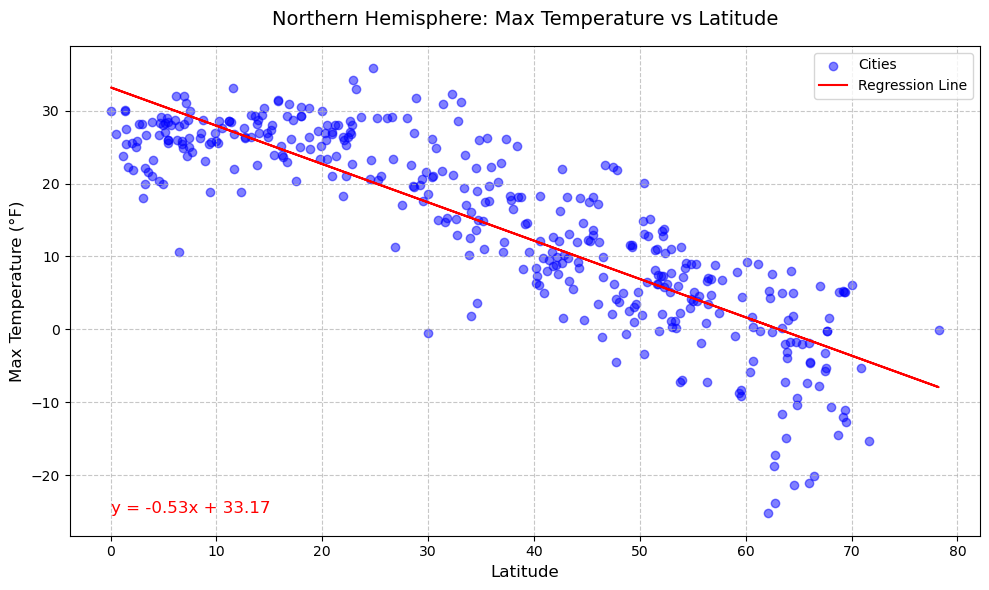


Southern Hemisphere Analysis
Statistical Results for Southern Hemisphere: Max Temperature vs Latitude
R-squared (r²): 0.5178
P-value: 0.0000
Standard Error: 0.0260
--------------------------------------------------


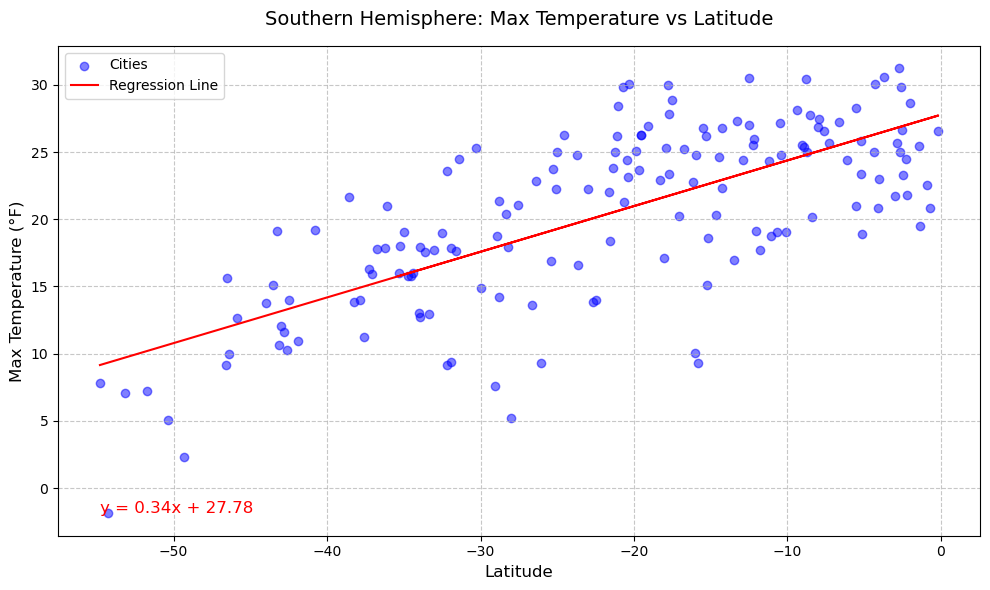

In [21]:
# Linear regression on Northern Hemisphere
# Linear regression on Southern Hemisphere

# Import required libraries if not already imported
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
 
def create_linear_regression_plot(x_values, y_values, xlabel, ylabel, title):
    """
    Create a linear regression plot with detailed statistics and formatting.
 
    Parameters:
    -----------
    x_values : array-like
        Values for x-axis (Latitude)
    y_values : array-like
        Values for y-axis (Max Temperature)
    xlabel : str
        Label for x-axis
    ylabel : str
        Label for y-axis
    title : str
        Title for the plot
    """
 
    # Calculate the linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
 
    # Calculate regression line
    regress_values = x_values * slope + intercept
 
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
    # Create the plot
    plt.figure(figsize=(10, 6))
 
    # Create scatter plot
    plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Cities')
 
    # Add regression line
    plt.plot(x_values, regress_values, color='red', label='Regression Line')
 
    # Add line equation annotation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), 
                color='red', fontsize=12)
 
    # Customize plot
    plt.title(title, pad=15, size=14)
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
 
    # Print statistics
    print(f"Statistical Results for {title}")
    print(f"R-squared (r²): {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Standard Error: {std_err:.4f}")
    print("-" * 50)
 
    # Show plot
    plt.tight_layout()
    plt.show()
 
# Analyze Northern Hemisphere
try:
    print("Northern Hemisphere Analysis")
    create_linear_regression_plot(
        x_values=northern_hemi_df['Lat'],
        y_values=northern_hemi_df['Max Temp'],
        xlabel='Latitude',
        ylabel='Max Temperature (°F)',
        title='Northern Hemisphere: Max Temperature vs Latitude'
    )
except Exception as e:
    print(f"Error in Northern Hemisphere analysis: {str(e)}")
 
# Analyze Southern Hemisphere
try:
    print("\nSouthern Hemisphere Analysis")
    create_linear_regression_plot(
        x_values=southern_hemi_df['Lat'],
        y_values=southern_hemi_df['Max Temp'],
        xlabel='Latitude',
        ylabel='Max Temperature (°F)',
        title='Southern Hemisphere: Max Temperature vs Latitude'
    )
except Exception as e:
    print(f"Error in Southern Hemisphere analysis: {str(e)}")


**Discussion about the linear relationship:** 

The data shows that there’s a strong link between latitude and temperature. As you move farther from the equator in the Northern Hemisphere, temperatures generally get lower.

In the Southern Hemisphere, As you move farther south from the equator, temperatures generally decrease.

### Humidity vs. Latitude Linear Regression Plot

Statistical Results for Northern Hemisphere: Humidity vs Latitude
R-squared (r²): 0.0104
P-value: 0.0427
Standard Error: 0.0487
--------------------------------------------------


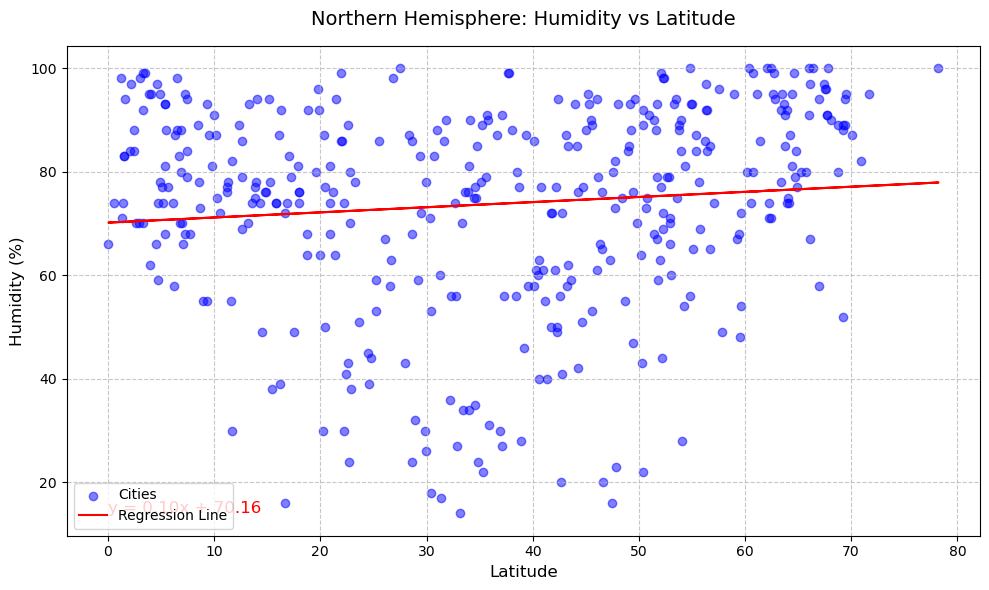

In [23]:
# Northern Hemisphere
create_linear_regression_plot(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='Northern Hemisphere: Humidity vs Latitude'
)

Statistical Results for Southern Hemisphere: Humidity vs Latitude
R-squared (r²): 0.0535
P-value: 0.0032
Standard Error: 0.1087
--------------------------------------------------


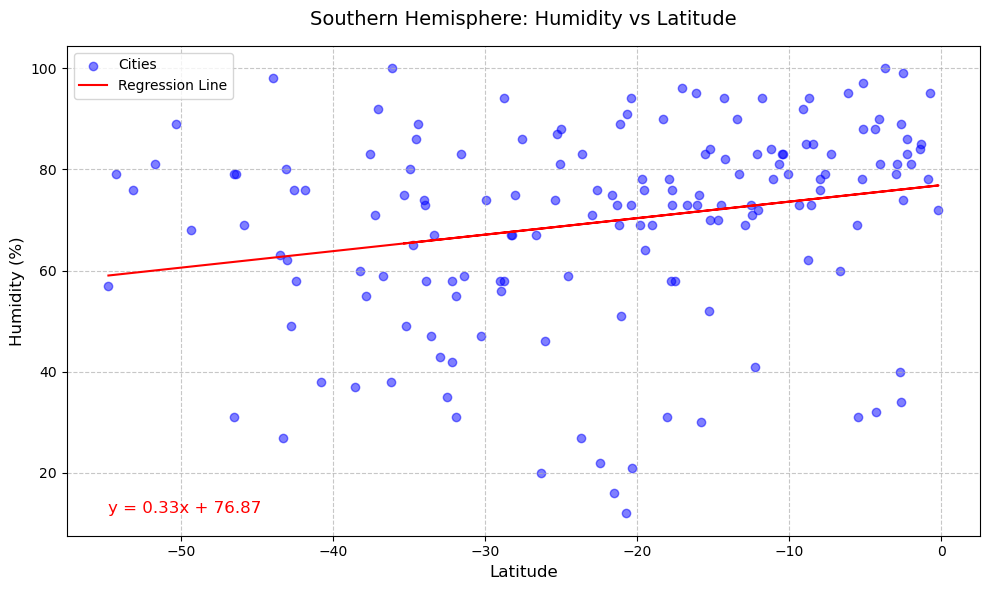

In [22]:
# Southern Hemisphere
create_linear_regression_plot(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='Southern Hemisphere: Humidity vs Latitude'
)

**Discussion about the linear relationship:** 

There’s a very weak and insignificant relationship between latitude and humidity in the Northern Hemisphere and the Southern Hemisphere. Latitude doesn’t explain much of the changes in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Statistical Results for Northern Hemisphere: Cloudiness vs Latitude
R-squared (r²): 0.0517
P-value: 0.0000
Standard Error: 0.0946
--------------------------------------------------


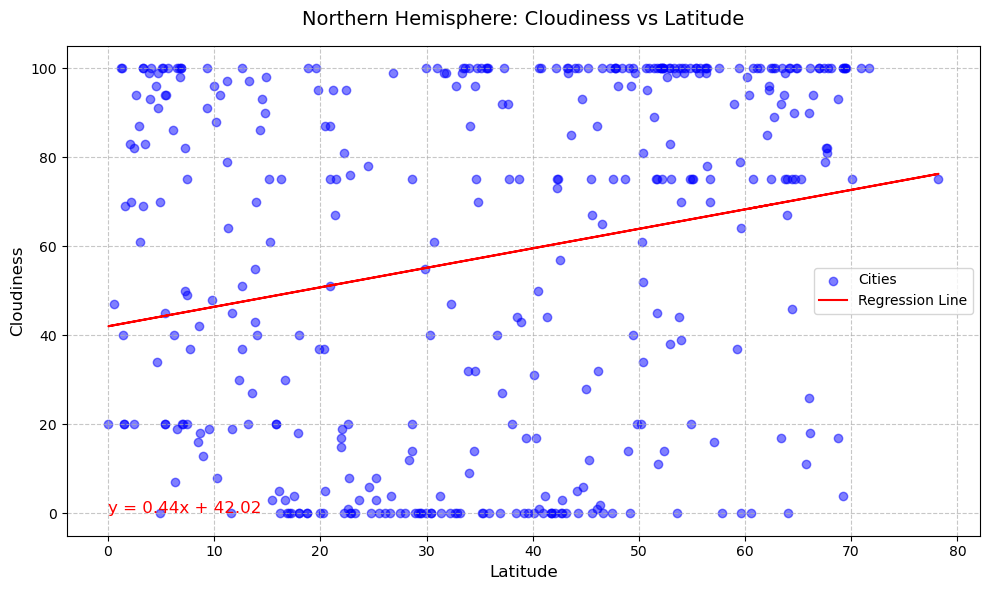

In [28]:
# Northern Hemisphere
create_linear_regression_plot(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness',
    title='Northern Hemisphere: Cloudiness vs Latitude'
)

Statistical Results for Southern Hemisphere: Cloudiness vs Latitude
R-squared (r²): 0.0121
P-value: 0.1649
Standard Error: 0.2132
--------------------------------------------------


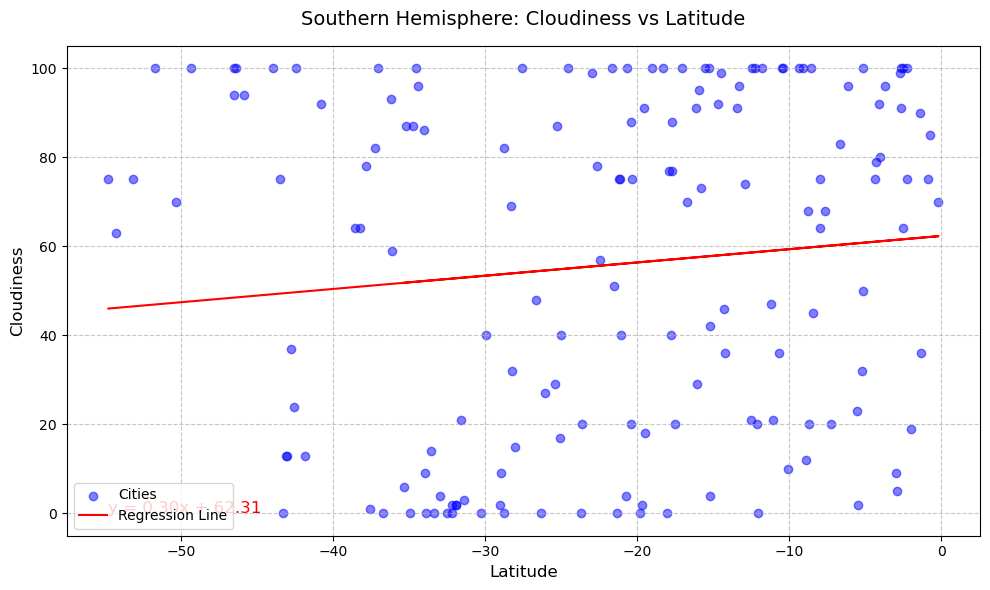

In [29]:
# Southern Hemisphere
create_linear_regression_plot(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness',
    title='Southern Hemisphere: Cloudiness vs Latitude'
)

**Discussion about the linear relationship:**

There’s a very weak relationship between latitude and cloudiness in the Northern Hemisphere. Although the relationship is statistically significant, latitude doesn’t explain much about cloudiness.

In the Southern Hemisphere there is no meaningful relationship between latitude and cloudiness. Latitude explains very little about how cloudy it is, and the results are not statistically significant.

### Wind Speed vs. Latitude Linear Regression Plot

Statistical Results for Northern Hemisphere: Wind Speed vs Latitude
R-squared (r²): 0.0101
P-value: 0.0460
Standard Error: 0.0061
--------------------------------------------------


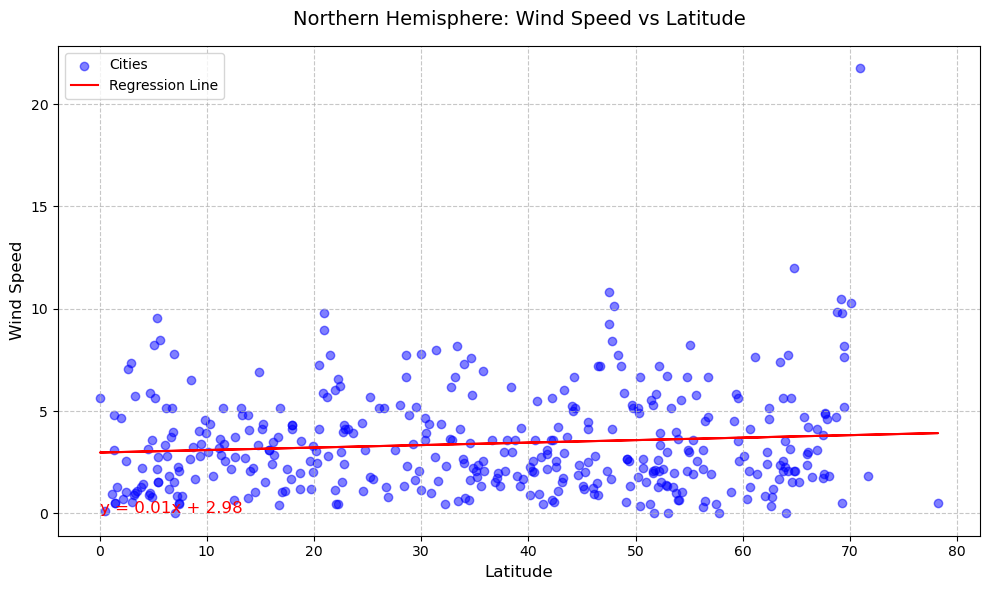

In [30]:
# Northern Hemisphere
create_linear_regression_plot(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed',
    title='Northern Hemisphere: Wind Speed vs Latitude'
)

Statistical Results for Southern Hemisphere: Wind Speed vs Latitude
R-squared (r²): 0.0824
P-value: 0.0002
Standard Error: 0.0154
--------------------------------------------------


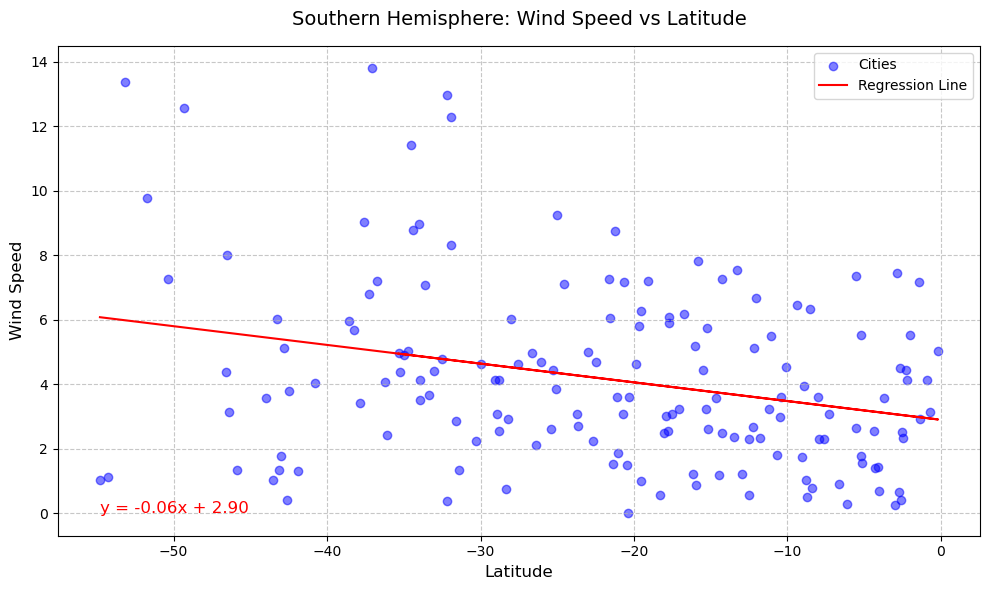

In [31]:
# Southern Hemisphere
create_linear_regression_plot(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed',
    title='Southern Hemisphere: Wind Speed vs Latitude'
)

**Discussion about the linear relationship:** 

There is a very weak relationship between latitude and wind speed in the Northern Hemisphere. While the relationship is statistically significant, latitude doesn’t explain much of the variation in wind speed.

In the Southern Hemisphere there is a weak but statistically significant relationship between latitude and wind speed . Latitude only explains a small portion of the changes in wind speed.

